In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# feature matching matches KEY FEATURES of images

In [7]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [8]:
reeses = cv2.imread('../DATA/reeses_puffs.png', 0)

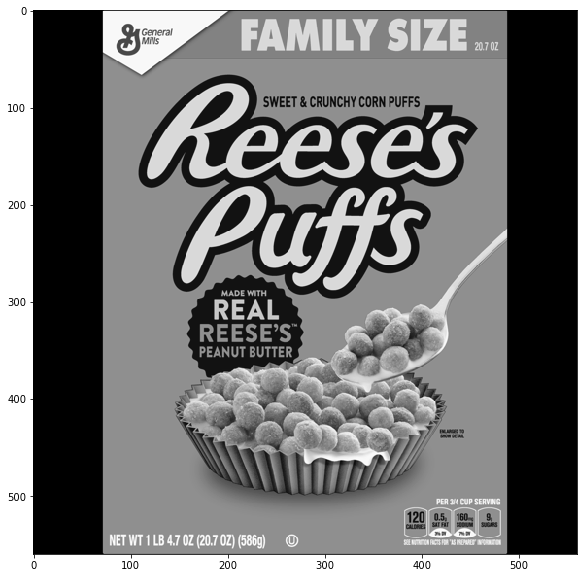

In [9]:
display(reeses)

In [10]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)

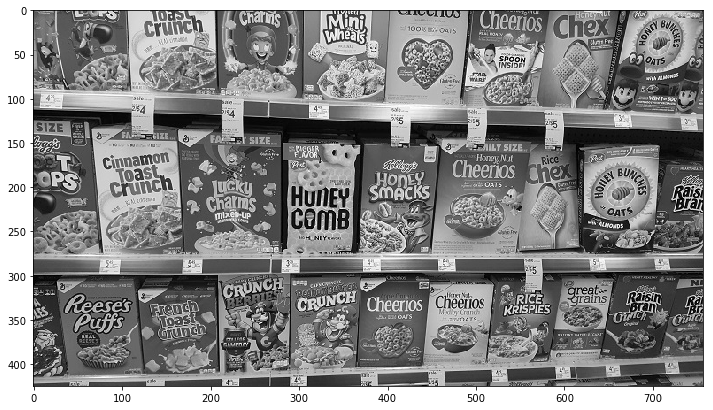

In [11]:
display(cereals)

In [12]:
# BRUTE FORCE MATCHING WITH ORB DESCRIPTORS

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [13]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [14]:
matches = bf.match(des1, des2)

In [15]:
matches = sorted(matches, key=lambda x:x.distance) # less distance = more match

In [16]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)

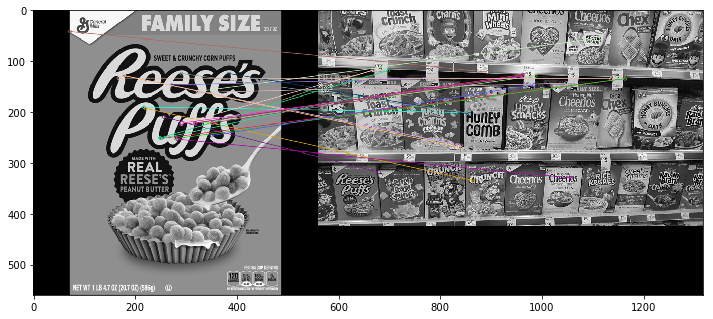

In [17]:
display(reeses_matches)

In [18]:
# BRUTE FORCE MATCHING WITH SIFT DESCRIPTORS AND RATIO TEST

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [19]:
bf = cv2.BFMatcher()

In [20]:
matches = bf.knnMatch(des1, des2, k=2)

In [21]:
matches

[[<DMatch 0000026D7D0D8BD0>, <DMatch 0000026D7D572450>],
 [<DMatch 0000026D7D572AB0>, <DMatch 0000026D7D572B90>],
 [<DMatch 0000026D7D572BF0>, <DMatch 0000026D7D572930>],
 [<DMatch 0000026D7D572C70>, <DMatch 0000026D7D5721D0>],
 [<DMatch 0000026D7D572B50>, <DMatch 0000026D7D5729D0>],
 [<DMatch 0000026D7D5729F0>, <DMatch 0000026D7D572A10>],
 [<DMatch 0000026D7D572A30>, <DMatch 0000026D7D572A70>],
 [<DMatch 0000026D7D572A90>, <DMatch 0000026D7D572CB0>],
 [<DMatch 0000026D7D572AD0>, <DMatch 0000026D7D572A50>],
 [<DMatch 0000026D7D572DB0>, <DMatch 0000026D7D572E50>],
 [<DMatch 0000026D7D572E30>, <DMatch 0000026D7D572E70>],
 [<DMatch 0000026D7D572E90>, <DMatch 0000026D7D572EB0>],
 [<DMatch 0000026D7D572ED0>, <DMatch 0000026D7D572EF0>],
 [<DMatch 0000026D7D572F10>, <DMatch 0000026D7D572F30>],
 [<DMatch 0000026D7D572F50>, <DMatch 0000026D7D572F70>],
 [<DMatch 0000026D7D572F90>, <DMatch 0000026D7D572FB0>],
 [<DMatch 0000026D7D572FD0>, <DMatch 0000026D7CD10030>],
 [<DMatch 0000026D7CD10050>, <D

In [22]:
goodMatches = []

for match1, match2 in matches:
    
    # IF MATCH 1 DISTANCE IS LESS THAN 75% OF MATCH 2 DISTANCE,
    # THEN DESCRIPTOR WAS A GOOD MATCH, LETS KEEP IT!
    if match1.distance < 0.75 * match2.distance:
        goodMatches.append([match1])

In [23]:
goodMatches

[[<DMatch 0000026D7CD10850>],
 [<DMatch 0000026D7CD10E10>],
 [<DMatch 0000026D7CD10E50>],
 [<DMatch 0000026D7D370090>],
 [<DMatch 0000026D7D370690>],
 [<DMatch 0000026D7D370990>],
 [<DMatch 0000026D7D370B10>],
 [<DMatch 0000026D7D370E90>],
 [<DMatch 0000026D7D372110>],
 [<DMatch 0000026D7D3724D0>],
 [<DMatch 0000026D7D3725D0>],
 [<DMatch 0000026D7D376890>],
 [<DMatch 0000026D7D3768D0>],
 [<DMatch 0000026D7D3769D0>],
 [<DMatch 0000026D7D37D790>],
 [<DMatch 0000026D7D37E150>],
 [<DMatch 0000026D7D37E210>],
 [<DMatch 0000026D7D37E2D0>],
 [<DMatch 0000026D7D37EB50>],
 [<DMatch 0000026D7D37EC90>],
 [<DMatch 0000026D7D381DD0>],
 [<DMatch 0000026D7D381F10>],
 [<DMatch 0000026D7D381F50>],
 [<DMatch 0000026D7D383150>],
 [<DMatch 0000026D7D383190>],
 [<DMatch 0000026D7D3883D0>],
 [<DMatch 0000026D7D388550>],
 [<DMatch 0000026D7D388590>],
 [<DMatch 0000026D7D388B50>],
 [<DMatch 0000026D7D388C50>],
 [<DMatch 0000026D7D388D10>],
 [<DMatch 0000026D7D38A310>],
 [<DMatch 0000026D7D38A690>],
 [<DMatch 

In [26]:
len(goodMatches)

78

In [27]:
len(matches)

1500

In [28]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, goodMatches, None, flags=2)

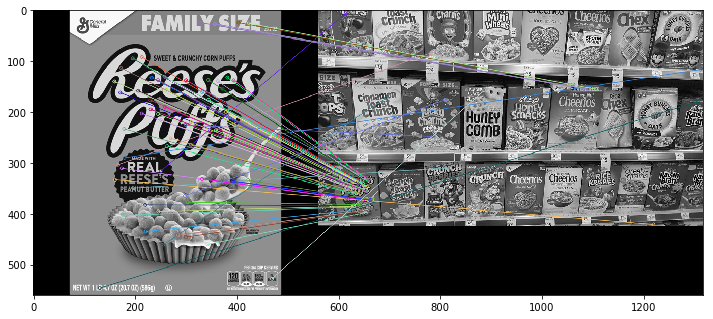

In [29]:
display(sift_matches)

In [52]:
# FLANN BASED MATCHER

sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [53]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [54]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [55]:
matches = flann.knnMatch(des1, des2, k=2)

In [56]:
matchesMask = [[0,0] for i in range(len(matches))]

In [57]:
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.75 * match2.distance:
        matchesMask[i] = [1,0]

In [58]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

In [59]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

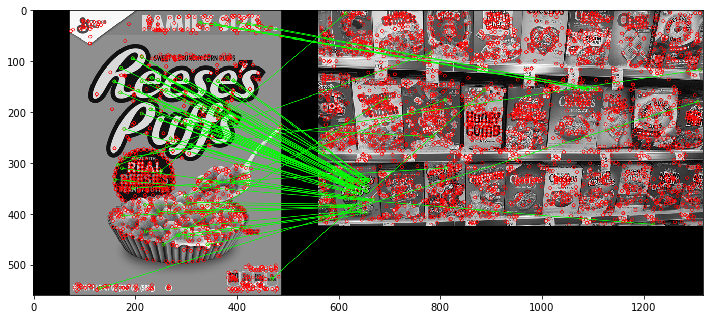

In [60]:
display(flann_matches)